In [1]:
!nvidia-smi

Thu Dec 12 00:02:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              43W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install scipy numpy numba llvmlite

In [4]:
!rm -rf /content/hifi-gan
import time
time.sleep(5)

In [5]:
%cd /content/

/content


In [6]:
!git clone https://github.com/jik876/hifi-gan.git

Cloning into 'hifi-gan'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48 (from 1)
Receiving objects: 100% (48/48), 620.94 KiB | 4.40 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [7]:
%cd hifi-gan

/content/hifi-gan


In [8]:
!pip install torch==1.11.0 numpy==1.17.4 librosa==0.7.2 tensorboard==2.0 soundfile==0.10.3.post1 matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.6 MB/s eta 0:00:00
  Preparing metadata (setup

In [9]:
!pip install scipy numpy numba llvmlite

In [10]:
# prompt: # prompt: # prompt: take all of the wav files in this folder /content/drive/MyDrive/2 Hours- 4 Countries English Speech Synthesis Corpus/2 Hours- 4 Countries English Speech Synthesis Corpus/data/New Zealand/Wave, downsample them from 48000Hz to 22050Hz and save them to a seperate folder called newZ_dataset then take the mel spectrogram of each of the wav after the downsamplin and save them as npy in a folder labeled ft_dataset both in the content folder, using
# #  "segment_size": 8192,
# #     "num_mels": 80,
# #     "num_freq": 1025,
# #     "n_fft": 1024,
# #     "hop_size": 256,
# #     "win_size": 1024,
# #     "sampling_rate": 22050,
# use librosa.filters.mel

import librosa
import librosa.display
import numpy as np
import os
import soundfile as sf

# Define paths
input_dir = "/content/drive/MyDrive/2 Hours- 4 Countries English Speech Synthesis Corpus/2 Hours- 4 Countries English Speech Synthesis Corpus/data/New Zealand/Wave"
output_dir_wav = "/content/newZ_dataset"
output_dir_mel = "/content/ft_dataset"

# Create output directories if they don't exist
os.makedirs(output_dir_wav, exist_ok=True)
os.makedirs(output_dir_mel, exist_ok=True)

# Define parameters
segment_size = 8192
num_mels = 80
num_freq = 1025
n_fft = 1024
hop_size = 256
win_size = 1024
sampling_rate = 22050

# Process each WAV file
for filename in os.listdir(input_dir):
    if filename.endswith(".wav"):
        input_filepath = os.path.join(input_dir, filename)
        output_filename = filename[:-4]  # Remove .wav extension

        try:
          # Load audio file
          y, sr = librosa.load(input_filepath, sr=None)

          # Downsample
          y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sampling_rate)

          # Save downsampled audio
          output_wav_path = os.path.join(output_dir_wav, f"{output_filename}_resampled.wav")
          sf.write(output_wav_path, y_resampled, sampling_rate)

          # Compute mel spectrogram
          mel_basis = librosa.filters.mel(sr=sampling_rate, n_fft=n_fft, n_mels=num_mels)
          stft = librosa.stft(y_resampled, n_fft=n_fft, hop_length=hop_size, win_length=win_size)
          magnitude = np.abs(stft)
          mel_spectrogram = np.dot(mel_basis, magnitude)

          # Save mel spectrogram
          output_mel_path = os.path.join(output_dir_mel, f"{output_filename}_mel.npy")
          np.save(output_mel_path, mel_spectrogram)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

100%|██████████| 341/341 [00:36<00:00,  9.33it/s]


In [11]:
# prompt: do a random test train split of the names of the npy files in ft_dataset, the create 2 files named training.txt and validation.txt and format them like the training txt and validation txt in /content/hifi-gan/LJSpeech-1.1 this folder
# write these files into the universal_v1 folder
# however use the names from the split for the row names and the text leave blank

import os
import random
from pathlib import Path

# Define paths
ft_dataset_folder = "/content/ft_dataset"
universal_v1_folder = "/content/UNIVERSAL_V1"  # Corrected path

# Create universal_v1 folder if it doesn't exist
Path(universal_v1_folder).mkdir(parents=True, exist_ok=True)

# Get the list of NPY files
npy_files = [f for f in os.listdir(ft_dataset_folder) if f.endswith(".npy")]

# Shuffle the list of files randomly
random.shuffle(npy_files)

# Split into training and validation sets (e.g., 80/20 split)
split_ratio = 0.8
split_index = int(len(npy_files) * split_ratio)
training_files = npy_files[:split_index]
validation_files = npy_files[split_index:]

# Create training.txt
with open(os.path.join(universal_v1_folder, "training.txt"), "w") as f:
  for file in training_files:
    filename_without_ext = os.path.splitext(file)[0]
    f.write(f"{filename_without_ext}| | \n")


# Create validation.txt
with open(os.path.join(universal_v1_folder, "validation.txt"), "w") as f:
  for file in validation_files:
    filename_without_ext = os.path.splitext(file)[0]
    f.write(f"{filename_without_ext}| | \n")

In [78]:
!python train.py --input_wavs_dir /content/newZ_dataset \
  --input_mels_dir /content/ft_dataset \
  --fine_tuning True \
  --config /content/UNIVERSAL_V1/checkpoints/config.json \
  --input_training_file /content/UNIVERSAL_V1/training.txt \
  --input_validation_file /content/UNIVERSAL_V1/validation.txt \
  --checkpoint_path /content/UNIVERSAL_V1/checkpoints \
  --input_wavs_dir /content/padded_wav_files



2024-12-12 02:23:33.750646: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 02:23:33.768095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 02:23:33.789319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 02:23:33.795807: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 02:23:33.811034: I tensorflow/core/platform/cpu_feature_guar

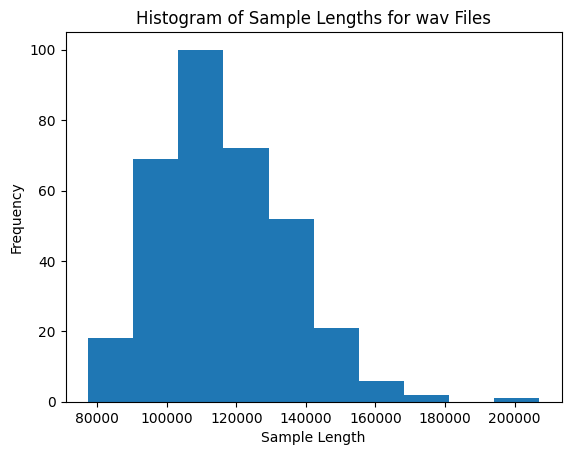

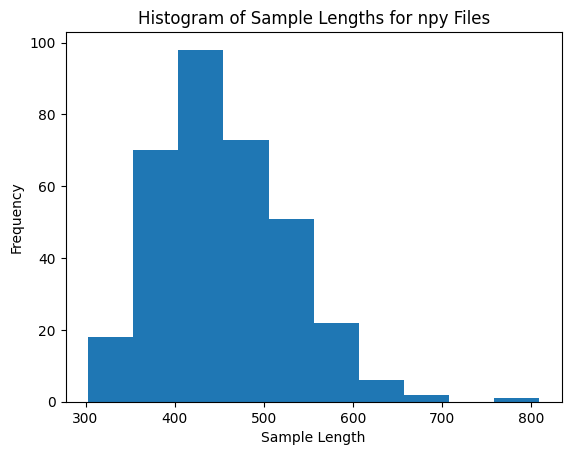

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def plot_sample_length_histogram(file_path, file_type, bins=10):
    """
    Plots a histogram of sample lengths for a given file type (wav or npy).

    Args:
        file_path (str): Path to the directory containing the files.
        file_type (str): 'wav' or 'npy'
        bins (int, optional): Number of bins for the histogram. Defaults to 10.
    """

    sample_lengths = []
    for file in os.listdir(file_path):
        if file.endswith(file_type):
            if file_type == 'wav':
                _, samples = wav.read(os.path.join(file_path, file))
                sample_lengths.append(len(samples))
            elif file_type == 'npy':
                samples = np.load(os.path.join(file_path, file))

                sample_lengths.append(samples.shape[1])

    plt.hist(sample_lengths, bins=bins)
    plt.xlabel('Sample Length')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Sample Lengths for {file_type} Files')
    plt.show()

# Example usage:
wav_dir = '/content/newZ_dataset'
npy_dir = '/content/ft_dataset'

plot_sample_length_histogram(wav_dir, 'wav')
plot_sample_length_histogram(npy_dir, 'npy')

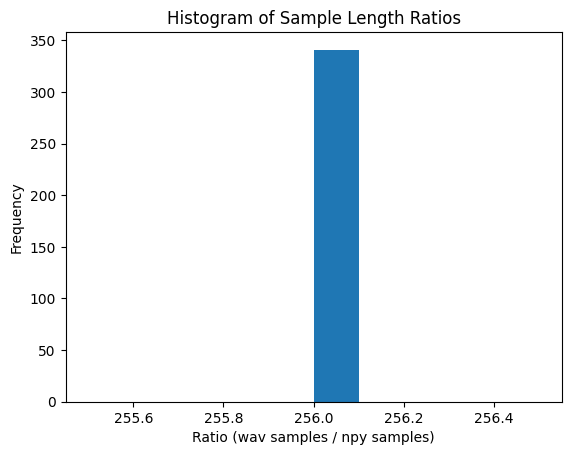

In [29]:
# prompt: import numpy as np
# import matplotlib.pyplot as plt
# import scipy.io.wavfile as wav
# def plot_sample_length_histogram(file_path, file_type, bins=10):
#     """
#     Plots a histogram of sample lengths for a given file type (wav or npy).
#     Args:
#         file_path (str): Path to the directory containing the files.
#         file_type (str): 'wav' or 'npy'
#         bins (int, optional): Number of bins for the histogram. Defaults to 10.
#     """
#     sample_lengths = []
#     for file in os.listdir(file_path):
#         if file.endswith(file_type):
#             if file_type == 'wav':
#                 _, samples = wav.read(os.path.join(file_path, file))
#                 sample_lengths.append(len(samples))
#             elif file_type == 'npy':
#                 samples = np.load(os.path.join(file_path, file))
#                 sample_lengths.append(samples.shape[1])
#     plt.hist(sample_lengths, bins=bins)
#     plt.xlabel('Sample Length')
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram of Sample Lengths for {file_type} Files')
#     plt.show()
# # Example usage:
# wav_dir = '/content/newZ_dataset'
# npy_dir = '/content/ft_dataset'
# plot_sample_length_histogram(wav_dir, 'wav')
# plot_sample_length_histogram(npy_dir, 'npy')
# modify this code to go through both folders and for files with the same name, determine the ratio of the wav samples/npy samples, then return that histogram

import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def plot_sample_ratio_histogram(wav_dir, npy_dir, bins=10):
    """
    Compares wav and npy files with the same name (excluding extensions)
    and plots a histogram of the ratio of their sample lengths.
    """
    ratios = []
    for wav_file in os.listdir(wav_dir):
        if wav_file.endswith(".wav"):
            wav_name = wav_file[:-4]  # Remove .wav extension
            npy_file = wav_name + ".npy"  # Construct corresponding npy filename
            npy_path = os.path.join(npy_dir, npy_file)

            if os.path.exists(npy_path):
                try:
                    _, wav_samples = wav.read(os.path.join(wav_dir, wav_file))
                    npy_samples = np.load(npy_path)
                    ratio = len(wav_samples) / npy_samples.shape[1]
                    ratios.append(ratio)
                except Exception as e:
                    print(f"Error processing {wav_file}: {e}")
            else:
                print(f"Corresponding NPY file not found for {wav_file}")

    plt.hist(ratios, bins=bins)
    plt.xlabel('Ratio (wav samples / npy samples)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sample Length Ratios')
    plt.show()


# Example usage:
wav_dir = '/content/padded_wav_files'
npy_dir = '/content/ft_dataset'
plot_sample_ratio_histogram(wav_dir, npy_dir)

In [28]:
# prompt: using the code of the above cell, truncate or zero pad the wav files so they have a perfect 256.0 ratio between the number of sampels in the wav files versus the npy files in the ft_dataset folder for all corresponding wav npy pairs
# save the padded wav files in a seperate folder

import os
import librosa
import numpy as np
import soundfile as sf
from pathlib import Path

# Define paths
ft_dataset_folder = "/content/ft_dataset"
newZ_dataset_folder = "/content/newZ_dataset"
padded_wav_folder = "/content/padded_wav_files"  # New folder for padded WAV files

# Create the padded_wav_folder if it doesn't exist
Path(padded_wav_folder).mkdir(parents=True, exist_ok=True)

# Target ratio
target_ratio = 256.0

# Iterate through the NPY files
for npy_file in os.listdir(ft_dataset_folder):
    if npy_file.endswith(".npy"):
        npy_path = os.path.join(ft_dataset_folder, npy_file)
        wav_file = npy_file.replace(".npy", ".wav")
        wav_path = os.path.join(newZ_dataset_folder, wav_file)

        if os.path.exists(wav_path):
            try:
                # Load the WAV file and NPY data
                y, sr = librosa.load(wav_path, sr=None)
                npy_data = np.load(npy_path)

                # Calculate the desired number of samples for the WAV file
                desired_wav_samples = int(npy_data.shape[1] * target_ratio)

                # Pad or truncate the WAV file
                if len(y) < desired_wav_samples:
                    # Zero-pad the WAV file
                    padding = desired_wav_samples - len(y)
                    y = np.pad(y, (0, padding), mode='constant')
                else:
                    # Truncate the WAV file
                    y = y[:desired_wav_samples]

                # Save the modified WAV file to the new directory
                padded_wav_path = os.path.join(padded_wav_folder, wav_file)
                sf.write(padded_wav_path, y, sr)

            except Exception as e:
                print(f"Error processing {wav_file}: {e}")
        else:
            print(f"Corresponding WAV file not found for {npy_file}")

In [42]:
import os
filepath = '/content/UNIVERSAL_V1/config.json'
assert os.path.isfile(filepath)


In [59]:
# prompt: # prompt: downsample the wav file in test_files to 22050Hz and average the channels together into one signal

import librosa
import soundfile as sf
import numpy as np
import os

def downsample_and_average(input_file, output_file):
    try:
        # Load the WAV file
        y, sr = librosa.load(input_file, sr=None, mono=False)  # Load with original sample rate and retain channels

        # Downsample
        y_resampled = librosa.resample(y, orig_sr=sr, target_sr=22050)

        # Average channels
        if y_resampled.ndim > 1:  # Check if the audio has multiple channels
            y_averaged = np.mean(y_resampled, axis=0) # Average across channels
        else:
            y_averaged = y_resampled # Already mono, no averaging needed

        # Save the processed audio
        sf.write(output_file, y_averaged, 22050)
        print(f"Processed {input_file} and saved to {output_file}")

    except Exception as e:
        print(f"Error processing {input_file}: {e}")

# Example usage: Assuming 'test_files' directory exists in the current working directory
test_files_dir = "/content/test_files"  # Replace with your actual directory

if not os.path.exists(test_files_dir):
    os.makedirs(test_files_dir)
    print(f"Directory '{test_files_dir}' created.")

# Create a dummy file for testing
dummy_wav_path = os.path.join(test_files_dir, "dummy.wav")
sr = 22050
duration = 5
frequency = 440
t = np.linspace(0, duration, int(sr*duration), endpoint=False)
x = 0.5 * np.sin(2*np.pi * frequency * t)
sf.write(dummy_wav_path, x, sr)

for filename in os.listdir(test_files_dir):
    if filename.endswith(".wav"):
        input_filepath = os.path.join(test_files_dir, filename)
        output_filepath = os.path.join(test_files_dir, filename.replace(".wav", "_processed.wav"))
        downsample_and_average(input_filepath, output_filepath)

Processed /content/test_files/converted_audio.wav and saved to /content/test_files/converted_audio_processed.wav
Processed /content/test_files/dummy.wav and saved to /content/test_files/dummy_processed.wav


In [54]:
# prompt: os.listdir of test_files

import os

test_files_dir = "/content/test_files"
print(os.listdir(test_files_dir))

['.ipynb_checkpoints', 'converted_audio_processed.wav']


In [76]:
!python inference.py --checkpoint_file /content/UNIVERSAL_V1/checkpoints/g_00010000 \
 --output_dir /content/generated_files/ \
 --input_wavs_dir /content/test_files/

Initializing Inference Process..
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/content/UNIVERSAL_V1/checkpoints/generator_v1
Loading '/content/UNIVERSAL_V1/checkpoints/generator_v1'
/content/hifi-gan/inference.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly a

22050


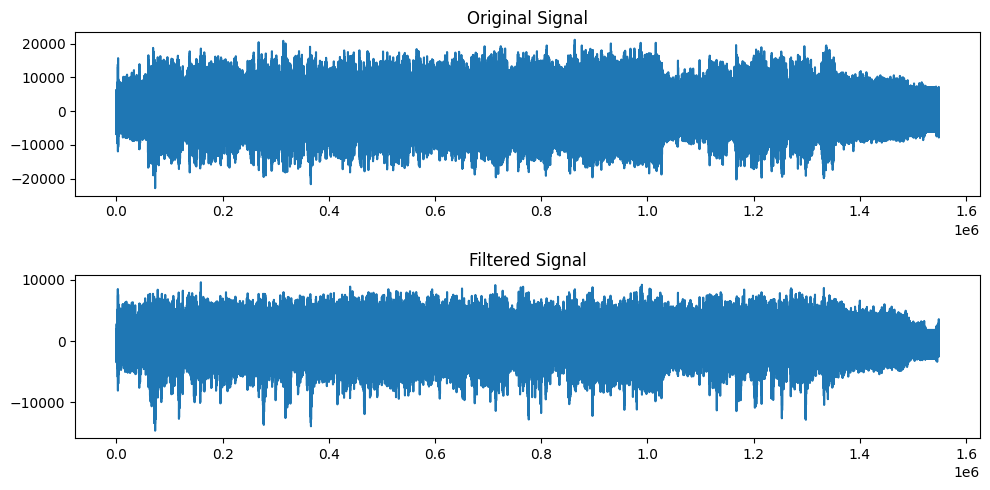

In [74]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.signal as signal
import matplotlib.pyplot as plt

# Load the audio signal
file_path = "/content/generated_files/converted_audio_processed_generated.wav"
sample_rate, audio_signal = wav.read(file_path)
print(sample_rate)

# Design the filter (e.g., Butterworth filter)
order = 10  # Filter order
cutoff_freq = 1000  # Cutoff frequency in Hz
nyquist_freq = sample_rate / 2
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = signal.butter(order, normalized_cutoff_freq, 'lowpass')

# Apply the filter
filtered_signal = signal.filtfilt(b, a, audio_signal)

# Plot the original and filtered signals (optional)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(audio_signal)
plt.title("Original Signal")
plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.title("Filtered Signal")
plt.tight_layout()
plt.show()

# Save the filtered signal
wav.write("/content/generated_files/filtered_audio.wav", sample_rate, filtered_signal.astype(np.int16))


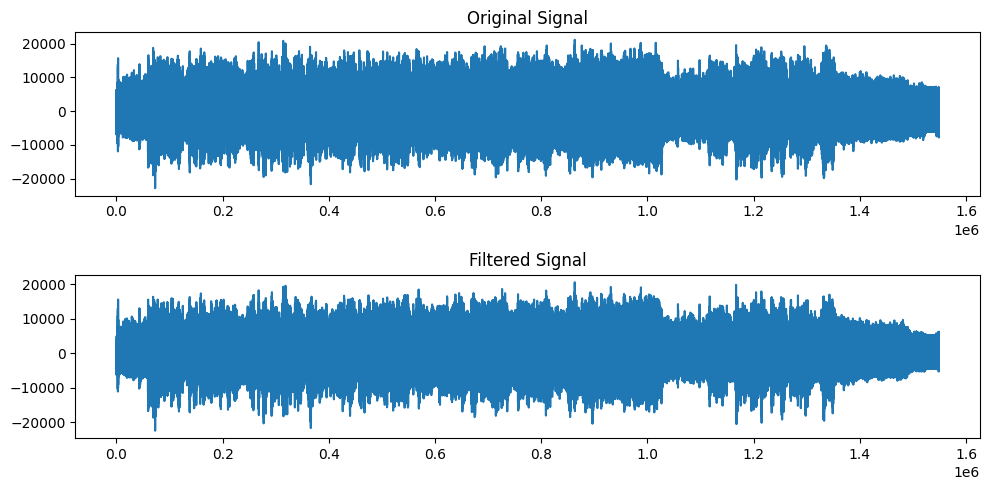

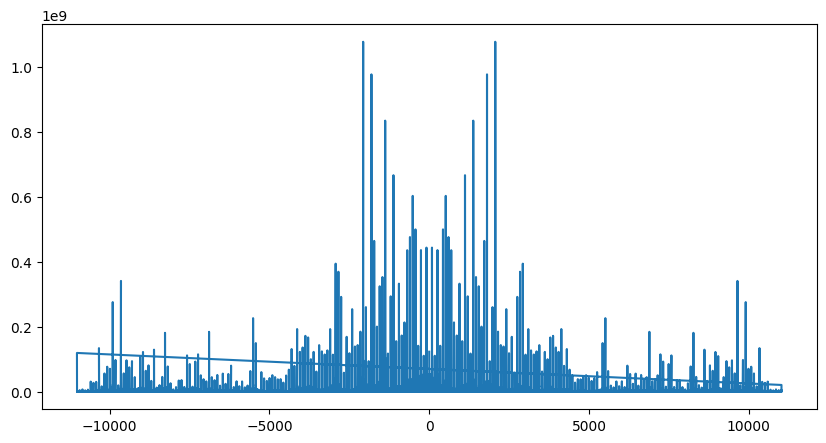

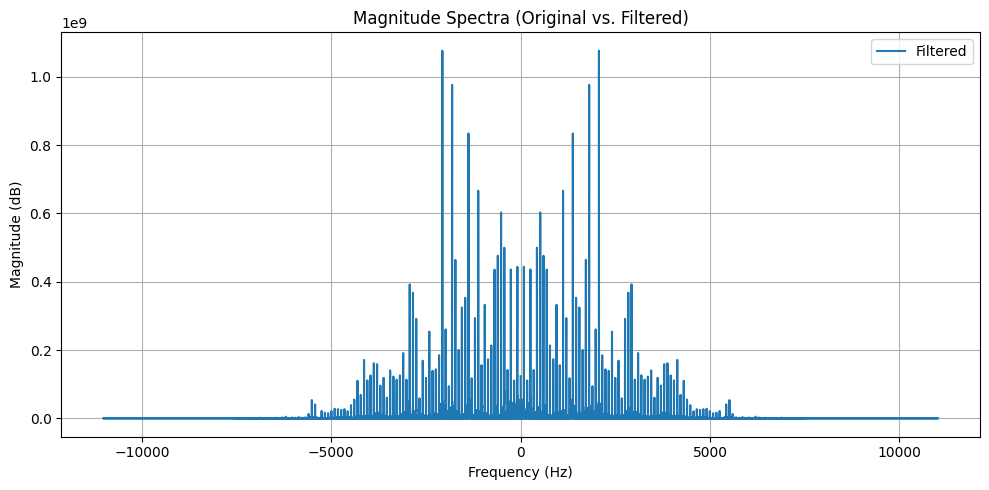

In [71]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.signal as signal
import matplotlib.pyplot as plt

def filter_and_analyze_audio(file_path, cutoff_freq=5000, order=4):
  """
  Loads an audio signal, applies a Butterworth low-pass filter, plots the original
  and filtered signals, calculates the magnitude spectrum before and after filtering,
  and displays the results.

  Args:
      file_path: Path to the audio file (.wav format).
      cutoff_freq: Cutoff frequency for the low-pass filter (Hz).
      order: Order of the Butterworth filter.
  """

  # Load the audio signal
  sample_rate, audio_signal = wav.read(file_path)

  # Design the Butterworth filter
  nyquist_freq = sample_rate / 2
  normalized_cutoff_freq = cutoff_freq / nyquist_freq
  b, a = signal.butter(order, normalized_cutoff_freq, 'lowpass')

  # Apply the filter
  filtered_signal = signal.filtfilt(b, a, audio_signal)

  # Plot the original and filtered signals
  plt.figure(figsize=(10, 5))
  plt.subplot(2, 1, 1)
  plt.plot(audio_signal)
  plt.title("Original Signal")
  plt.subplot(2, 1, 2)
  plt.plot(filtered_signal)
  plt.title("Filtered Signal")
  plt.tight_layout()

  # Compute the DFT using FFT for both original and filtered signals
  original_fft = np.fft.fft(audio_signal)
  filtered_fft = np.fft.fft(filtered_signal)

  # Calculate the frequency axis
  freq = np.fft.fftfreq(len(audio_signal), d=1/sample_rate)

  # Plot the magnitude spectra
  plt.figure(figsize=(10, 5))
  plt.plot(freq, np.abs(original_fft), label="Original")
  plt.figure(figsize=(10, 5))
  plt.plot(freq, np.abs(filtered_fft), label="Filtered")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude (dB)")  # Use dB scale for better visualization
  plt.title("Magnitude Spectra (Original vs. Filtered)")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

# Example usage
file_path = "/content/generated_files/converted_audio_processed_generated.wav"
filter_and_analyze_audio(file_path)